# Convexity of the objective function
In this notebook I qualitatively analyze the convexity of the objective function

$$ E(w) = \frac{1}{2} \sum_{j \in OutputLayer} (y_j - g(x;w)_j)^2  + \frac{1}{2} \sum_{i,j} w_{i,j}^2$$

The regularization strenght is fixed to $\lambda = 0.01$.
For the sake of visualization, I will use only one parameter $w$ and a fixed bias $b=1$. The dataset is composed by one pattern $x=2$ with target $y=4$. Basically the neural network will be the function 

$$g(x;w) = f(w \cdot x + b)$$

where the activation function $f$ is one of "Linear", "ReLU", "Sigmoid" e "TanH" 

In [11]:
from Neural_network import *
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [37]:
# examples and labels
x = [[2]]
y = np.array([4])

# objective function
mse = SquaredError()
mee = EuclideanError()
# network architecture
architecture = [1, 1]
# domain of objective function [-5,5]
weights = np.linspace(-5, 5, 10000)

def compute_loss(network, weights, loss_object):
    loss_values = [] # list of losses
    for w in weights:
        current_w = [w, 1] # bias 1
        network.layers[1].neurons[0].weights = current_w # set neuron weights
        score = network.predict(x)
        loss = loss_object.value(score, y, current_w, regularization=0.01)
        loss_values.append(loss)
    return loss_values

def plot_loss_vs_weight(weights, loss_values):
    plt.plot(weights, loss_values, linewidth=2)
    plt.xlabel("w")
    plt.ylabel("E(w)")
    plt.show()

LinearNeuron
6499 0.03318957018214125


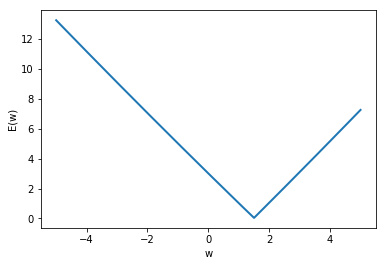

ReLuNeuron
6499 0.03318957018214125


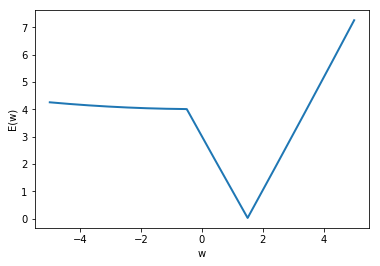

SigmoidNeuron
6563 3.050320442453799


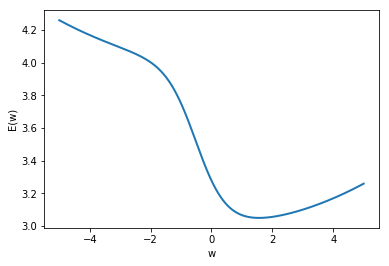

TanHNeuron
5997 3.0249448877920395


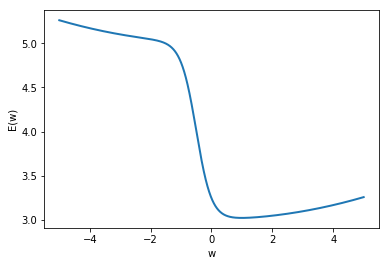

In [39]:
activations = [LinearNeuron, ReLuNeuron, SigmoidNeuron, TanHNeuron]

for activation in activations:
    print activation.__name__
    network = Network(architecture, [InputNeuron, activation])
    loss_values = compute_loss(network, weights, mee)
    print np.argmin(loss_values), min(loss_values)
    plot_loss_vs_weight(weights, loss_values)